In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [148]:
df = pd.read_csv("glass.csv")
df.head(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## **Chi tiết về dữ liệu của các cột**
- RI: chỉ số khúc xạ
- Na: Sodium
- Mg: Magnesium
- Al: Aluminum
- Si: Silicon
- K: Potassium
- Ca: Calcium
- Ba: Barium
- Fe: Iron
- Type of glass:
  - 1 - Kính cửa sổ tòa nhà được xử lý bằng phương pháp float
  - 2 - Kính cửa sổ tòa nhà không được xử lý bằng phương pháp float
  - 3 - Kính cửa xe được xử lý bằng phương pháp float
  - 4 - Kính cửa xe không được xử lý bằng phương pháp float
  - 5 - Kính đựng đồ (dùng để làm chai, lọ,...)
  - 6 - Kính dùng trong nhà bếp
  - 7 - Kính dùng làm đèn pha


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


Không có dữ liệu nào null

In [150]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [151]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [152]:
df['Type'].value_counts()

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

## Vẽ biểu đồ Histogram

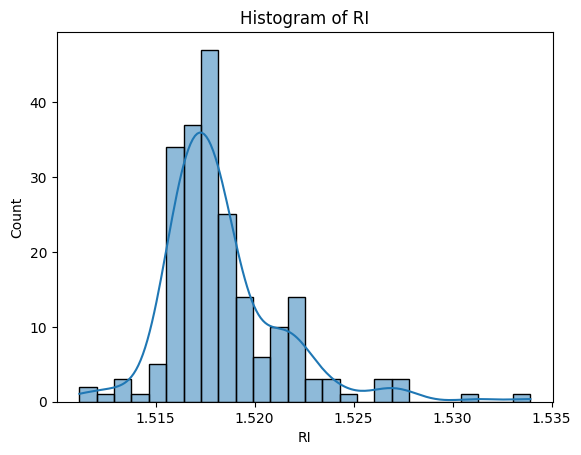

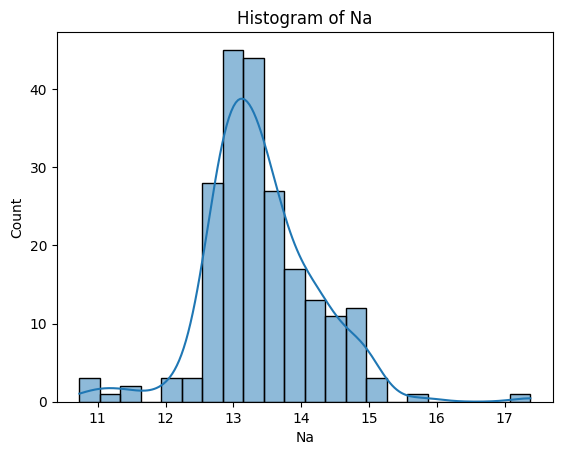

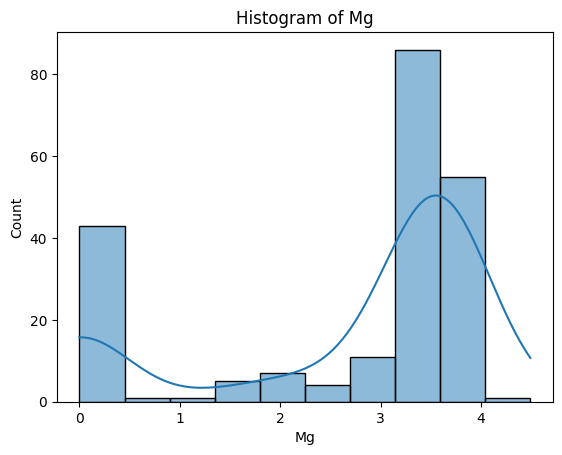

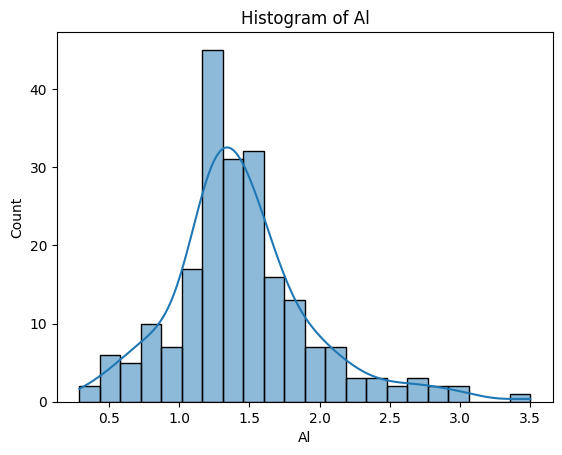

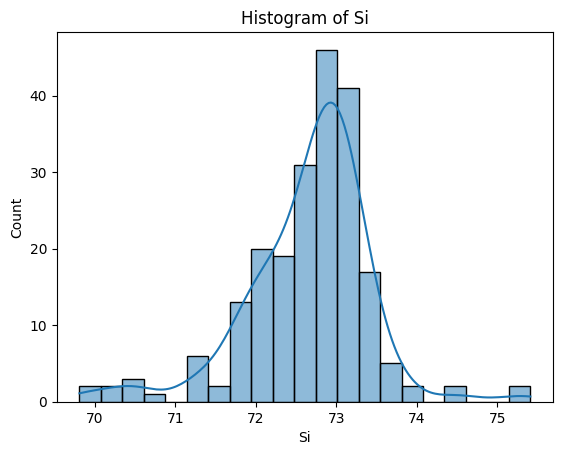

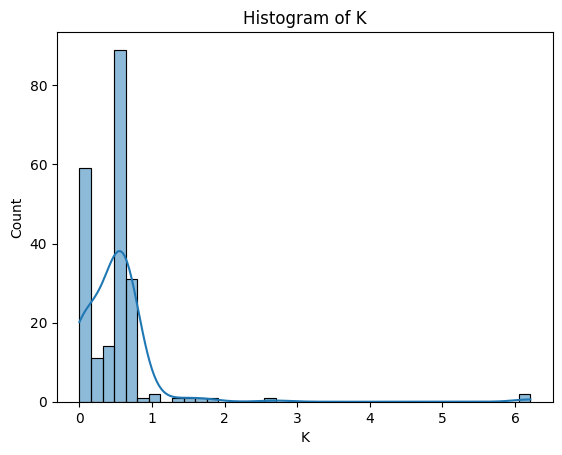

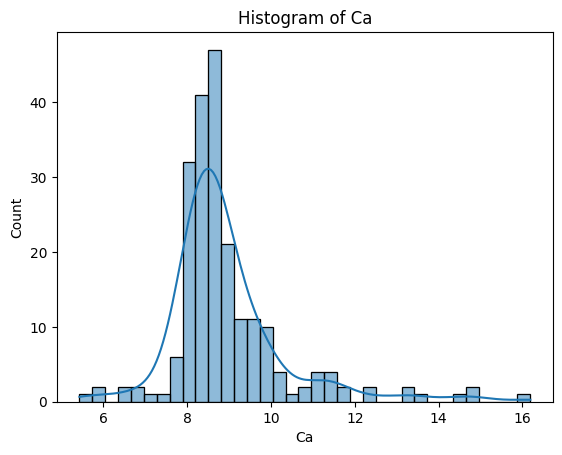

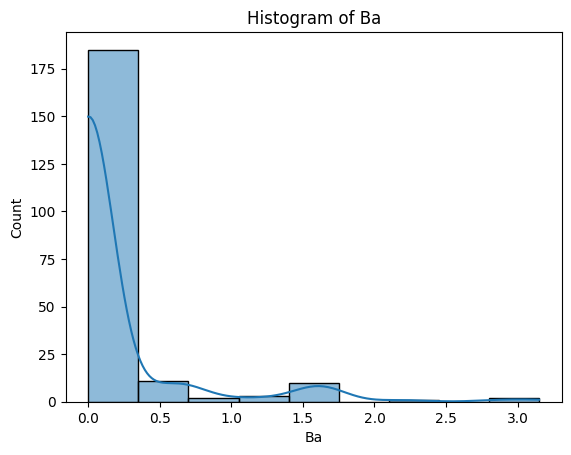

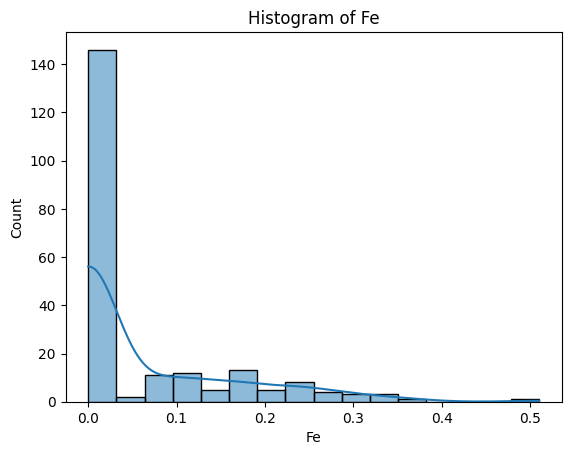

In [153]:
cols = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
for i in cols:
    sns.histplot(data=df, x=i, kde = True)
    plt.title(f"Histogram of {i}")
    plt.show()

## Vẽ ma trận tương quan

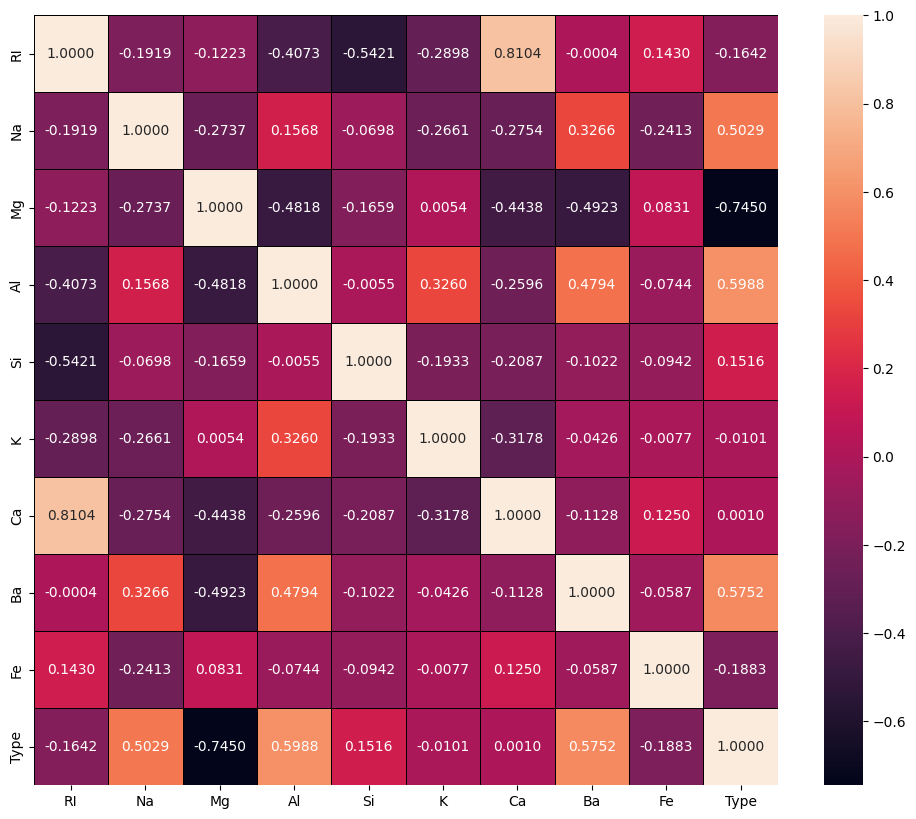

In [154]:
cols = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
f, ax = plt.subplots(figsize = (12,10))
sns.heatmap(df[cols].corr(), annot = True, linewidths = 0.5, linecolor = "black", fmt = ".4f", ax = ax)
plt.show()

**Nhận xét về dữ liệu:**
- K và Ca có giá trị tương quan với Type rất nhỏ nên 2 thành phần K và Ca không ảnh hưởng đến loại kính
- RI và Ca có giá trị tương quan lớn nên giữ lại 1 trong 2 cột giá trị

***
*Do đó, bỏ được 2 cột K và Ca.*

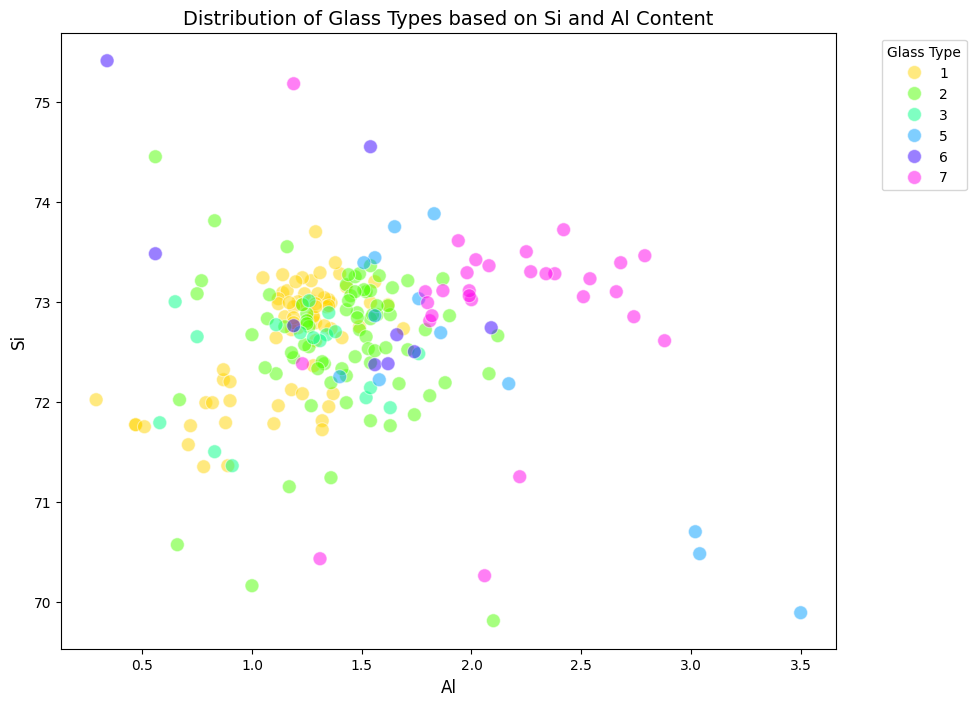

In [155]:

plt.figure(figsize=(10, 8))

# Xác định bảng màu cho các loại kính khác nhau
palette = sns.color_palette("hsv", df['Type'].nunique())

# sd scatter plot Al và Si vì Al ảnh hưởng cao đến Type và Al vs Si khác nhau
sns.scatterplot(x='Al', y='Si', hue='Type', palette=palette, data=df, s=100, alpha=0.5)

plt.xlabel('Al', fontsize=12)
plt.ylabel('Si', fontsize=12)
plt.title('Distribution of Glass Types based on Si and Al Content', fontsize=14)
plt.legend(title='Glass Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

## Chia tập dữ liệu

In [156]:
X = df[['RI', 'Na', 'Mg', 'Al', 'Si', 'Ba', 'Fe']]
y = df['Type']

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Lưu tập dữ liệu train và test

In [158]:
# Tạo DataFrame từ dữ liệu
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# Lưu dữ liệu vào các file CSV
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

## Xây dựng model KNN
- Chọn k=7
- Chọn phương pháp đo khoảng cách là "manhattan"

Trong không gian nhiều chiều, khoảng cách Manhattan giữa hai điểm P1(x1, y1, z1,..., n2) và P2(x2, y2, z2,..., n2)
Manhattan distance = |x1-x2| + |y1-y2| + ... + |n1-n2|

![](https://static.packt-cdn.com/products/9781789956399/graphics/C12628_01_06.jpg)

In [159]:
knnModel = KNeighborsClassifier(n_neighbors = 7, metric='manhattan')

In [160]:
# Fitting the data
knnModel.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=7)

In [161]:
# Prediting the classes
pred = knnModel.predict(X_test)
pred

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 1, 7, 2, 1, 2, 6, 2, 6, 1, 1, 7, 2, 7,
       7, 7, 1, 1, 1, 1, 5, 1, 1, 1, 2, 2, 1, 7, 2, 1, 1, 2, 1, 7, 3])

In [162]:
np.array(y_test)

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 2, 6, 5, 2, 2, 6, 5, 7, 1, 1, 6, 2, 7,
       7, 7, 3, 2, 1, 1, 5, 1, 1, 2, 3, 2, 1, 7, 5, 3, 2, 2, 2, 7, 1])

In [163]:
acc = accuracy_score(y_test, pred)
acc

0.627906976744186

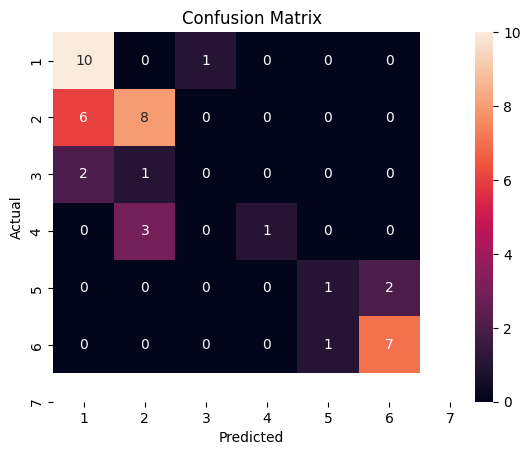

In [164]:
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=['1', '2', '3', '4', '5', '6', '7'],
            yticklabels=['1', '2', '3', '4', '5', '6', '7'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Sử dụng dữ liệu được chuẩn hóa

In [165]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xn = scaler.fit_transform(X)

In [166]:
# Lưu scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [167]:
X_train, X_test, y_train, y_test = train_test_split(Xn,y,test_size = 0.2, random_state = 42)

In [168]:
knnModel = KNeighborsClassifier(n_neighbors = 7, metric='manhattan')

In [169]:
# Fitting the data
knnModel.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=7)

In [170]:
# Prediting the classes
pred = knnModel.predict(X_test)
pred

array([1, 7, 1, 7, 2, 5, 1, 2, 2, 1, 5, 2, 1, 2, 6, 5, 7, 1, 1, 7, 2, 7,
       7, 7, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 7, 5, 1, 1, 2, 1, 7, 1])

In [171]:
np.array(y_test)

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 2, 6, 5, 2, 2, 6, 5, 7, 1, 1, 6, 2, 7,
       7, 7, 3, 2, 1, 1, 5, 1, 1, 2, 3, 2, 1, 7, 5, 3, 2, 2, 2, 7, 1])

In [172]:
acc = accuracy_score(y_test, pred)
acc

0.6976744186046512

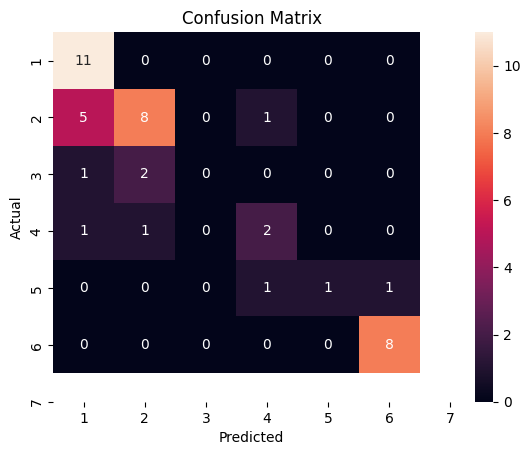

In [173]:
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=['1', '2', '3', '4', '5', '6', '7'],
            yticklabels=['1', '2', '3', '4', '5', '6', '7'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

*Sau khi chuẩn hóa model đã đạt được độ chính xác tốt hơn*

## Lưu model

In [174]:
import joblib

# Lưu mô hình
joblib.dump(knnModel, 'knn_model.pkl')

['knn_model.pkl']